<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [7]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [8]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [9]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [10]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [11]:
import yfinance as yf

# Create a Ticker object for Tesla (TSLA)
msft = yf.Ticker("TSLA")

# Now you have the 'msft' object, and you can access various data:

# 1. Get historical data:
historical_data = msft.history(period="1y")  # Get data for the last year.  You can adjust the period (e.g., "max", "5y", "1mo", etc.)
print(historical_data.head())  # Print the first few rows

# 2. Get current price:
current_price = msft.info['currentPrice']
print(f"Current Price: {current_price}")

# 3. Get company info:
company_info = msft.info
#print(company_info)  # Print all available information (a lot!)
print(f"Company Name: {company_info.get('longName', 'N/A')}") # Safer way to access potentially missing keys
print(f"Industry: {company_info.get('industry', 'N/A')}")
print(f"Website: {company_info.get('website', 'N/A')}")


# 4. Get financials (income statement, balance sheet, cash flow):
income_statement = msft.financials
balance_sheet = msft.balance_sheet
cashflow = msft.cashflow

# Note: These might return an empty dataframe if data is not available. Check before using.
if not income_statement.empty:
    print("\nIncome Statement:")
    print(income_statement)
else:
    print("Income Statement data not available.")

# 5. Get recommendations from other analysts
recommendations = msft.recommendations
#print("\nRecommendations:")
#print(recommendations)

# 6. Get events (splits, dividends):
events = msft.calendar
#print("\nEvents:")
#print(events)

# 7. Get major holders
major_holders = msft.major_holders
#print("\nMajor Holders:")
#print(major_holders)

# 8. Get institutional holders
institutional_holders = msft.institutional_holders
#print("\nInstitutional Holders:")
#print(institutional_holders)



# ... and many more!  Explore the 'msft' object's attributes and methods.

                                 Open        High         Low       Close  \
Date                                                                        
2024-02-12 00:00:00-05:00  192.110001  194.729996  187.279999  188.130005   
2024-02-13 00:00:00-05:00  183.990005  187.259995  182.110001  184.020004   
2024-02-14 00:00:00-05:00  185.300003  188.889999  183.350006  188.710007   
2024-02-15 00:00:00-05:00  189.160004  200.880005  188.860001  200.449997   
2024-02-16 00:00:00-05:00  202.059998  203.169998  197.399994  199.949997   

                              Volume  Dividends  Stock Splits  
Date                                                           
2024-02-12 00:00:00-05:00   95498600        0.0           0.0  
2024-02-13 00:00:00-05:00   86759500        0.0           0.0  
2024-02-14 00:00:00-05:00   81203000        0.0           0.0  
2024-02-15 00:00:00-05:00  120831800        0.0           0.0  
2024-02-16 00:00:00-05:00  111173600        0.0           0.0  
Current Pric

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [12]:
import yfinance as yf
import pandas as pd

# Create a Ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Extract historical data with the maximum period
tesla_data = tesla.history(period="max")

# Now 'tesla_data' is a Pandas DataFrame containing the historical stock data.

# Print the first few rows to verify:
print(tesla_data.head())

# Print the last few rows to verify:
print(tesla_data.tail())

# You can save the DataFrame to a CSV file:
tesla_data.to_csv("tesla_max_data.csv")

# Or to an Excel file:
# tesla_data.to_excel("tesla_max_data.xlsx")

# Display some information about the DataFrame
print("\nDataFrame Info:")
tesla_data.info()

# Display descriptive statistics
print("\nDataFrame Description:")
print(tesla_data.describe())

# Accessing specific columns:
print("\nClose Prices:")
print(tesla_data['Close'])

print("\nVolume:")
print(tesla_data['Volume'])

# Accessing a specific date:
print("\nPrice on 2023-01-03 (example, adjust date):")
try:
    print(tesla_data.loc['2023-01-03'])  # Using .loc for label-based indexing
except KeyError:
    print("Data not available for this date.")

# Accessing a range of dates:
print("\nPrice from 2023-01-01 to 2023-01-10 (example, adjust dates):")
print(tesla_data.loc['2023-01-01':'2023-01-10'])

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  
                                 Open        High         Low       

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [13]:
import yfinance as yf
import pandas as pd

# Create a Ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Extract historical data with the maximum period
tesla_data = tesla.history(period="max")

# Reset the index in place
tesla_data.reset_index(inplace=True)

# Display the first five rows
print(tesla_data.head())


# The rest of the code from the previous example (optional, but good for exploration)
# ... (You can include or exclude the following parts depending on what you need) ...
# print(tesla_data.tail())
# tesla_data.to_csv("tesla_max_data.csv")
# tesla_data.info()
# tesla_data.describe()
# print(tesla_data['Close'])
# print(tesla_data['Volume'])
# try:
#     print(tesla_data.loc['2023-01-03'])
# except KeyError:
#     print("Data not available for this date.")
# print(tesla_data.loc['2023-01-01':'2023-01-10'])

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [14]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

try:
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)
    html_data = response.text

    # You can now work with the html_data
    # For example, print the first 100 characters:
    # print(html_data[:100])

except requests.exceptions.RequestException as e:
    print(f"Error fetching URL: {e}")
    html_data = None  # Or handle the error as needed

if html_data:
    # Now you have the HTML content in the html_data variable
    # You can proceed with parsing it using BeautifulSoup, for example
    pass # placeholder

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [15]:
import requests
from bs4 import BeautifulSoup

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

try:
    response = requests.get(url)
    response.raise_for_status()
    html_data = response.text

    # Parse the HTML data using BeautifulSoup
    soup = BeautifulSoup(html_data, 'html5lib')  # or 'html.parser'

    # Now you can work with the soup object.  For example:

    # 1. Print the title of the page:
    title = soup.title.string if soup.title else "No Title Found"
    print(f"Title: {title}")

    # 2. Find all tables:
    tables = soup.find_all('table')
    print(f"Number of tables: {len(tables)}")

    # 3. Find the first table (often the revenue table):
    if tables:
        first_table = tables[0]

        # Example: Print the text content of the first table (you'll likely want to process it further)
        # for row in first_table.find_all('tr'):
        #     for cell in row.find_all(['td', 'th']):
        #         print(cell.text, end=" | ")
        #     print()  # New line for each row

        # 4. Extract data into a list of lists (more structured)
        data = []
        for row in first_table.find_all('tr'):
            row_data = []
            for cell in row.find_all(['td', 'th']):
                row_data.append(cell.text.strip()) #remove extra spaces
            data.append(row_data)

        # Print the extracted data (or process it further)
        # for row in data:
        #     print(row)

        # 5. Convert to pandas DataFrame (highly recommended for analysis)
        import pandas as pd
        df = pd.DataFrame(data[1:], columns=data[0]) # Skip header row

        print(df.head()) # print first few rows

        # Remove rows with missing values (if any)
        df.dropna(inplace=True)

        print(df.head())

        # Save to CSV
        df.to_csv("revenue_data.csv", index=False)

    else:
        print("No tables found on the page.")

except requests.exceptions.RequestException as e:
    print(f"Error fetching URL: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

Title: Tesla Revenue 2010-2022 | TSLA | MacroTrends
Number of tables: 6
An error occurred: 1 columns passed, passed data had 2 columns


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [16]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

try:
    response = requests.get(url)
    response.raise_for_status()
    html_data = response.text

    # Method 1: Using BeautifulSoup (more control)
    soup = BeautifulSoup(html_data, 'html5lib')

    # Find the relevant table body (index 1 as indicated)
    table_body = soup.find_all("tbody")[1]

    # Initialize an empty DataFrame
    tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

    # Iterate through the rows of the table body
    for row in table_body.find_all("tr"):
        cells = row.find_all("td")  # Find all data cells in the row
        if len(cells) == 2:  # Ensure there are two cells (Date and Revenue)
            date = cells[0].text.strip()
            revenue = cells[1].text.strip().replace(",", "").replace("$", "") # Clean up the revenue string
            tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

    # Convert 'Revenue' to numeric (if needed) after the loop
    tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

    # Method 2: Using read_html (simpler, but less control)
    # tables = pd.read_html(html_data)
    # tesla_revenue = tables[1]  # The Tesla revenue table is at index 1
    # tesla_revenue.columns = ["Date", "Revenue"] # set the columns names
    # tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '')
    # tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')


    print(tesla_revenue.head())
    print(tesla_revenue.info())
    tesla_revenue.to_csv("tesla_revenue.csv", index=False)

except requests.exceptions.RequestException as e:
    print(f"Error fetching URL: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

         Date  Revenue
0  2022-09-30  21454.0
1  2022-06-30  16934.0
2  2022-03-31  18756.0
3  2021-12-31  17719.0
4  2021-09-30  13757.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     54 non-null     object 
 1   Revenue  53 non-null     float64
dtypes: float64(1), object(1)
memory usage: 996.0+ bytes
None


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [17]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

AttributeError: Can only use .str accessor with string values!

Execute the following lines to remove an null or empty strings in the Revenue column.


In [18]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

try:
    response = requests.get(url)
    response.raise_for_status()
    html_data = response.text

    # Method 1: Using BeautifulSoup (more control) - Recommended
    soup = BeautifulSoup(html_data, 'html5lib')

    table_body = soup.find_all("tbody")[1]

    tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

    for row in table_body.find_all("tr"):
        cells = row.find_all("td")
        if len(cells) == 2:
            date = cells[0].text.strip()
            revenue = cells[1].text.strip().replace(",", "").replace("$", "")
            tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

    # Convert 'Revenue' to numeric, handling errors
    tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

    # Drop rows with NaN values in 'Revenue' after conversion
    tesla_revenue.dropna(subset=['Revenue'], inplace=True)


    # Display the last 5 rows
    print(tesla_revenue.tail())

    # Save to CSV (optional)
    tesla_revenue.to_csv("tesla_revenue.csv", index=False)

except requests.exceptions.RequestException as e:
    print(f"Error fetching URL: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

          Date  Revenue
48  2010-09-30     31.0
49  2010-06-30     28.0
50  2010-03-31     21.0
52  2009-09-30     46.0
53  2009-06-30     27.0


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [20]:
import yfinance as yf

# Create a Ticker object for GameStop (GME)
gme = yf.Ticker("GME")

# Now you have the 'gme' object. You can use it to access various data:

# Example 1: Get historical data
historical_data = gme.history(period="1y")  # Get data for the last year (adjust period as needed)
print(historical_data.head())  # Print the first few rows

# Example 2: Get current price
current_price = gme.info.get('currentPrice', 'N/A') # Safer access in case it is missing
print(f"Current Price: {current_price}")

# Example 3: Get company info
company_info = gme.info
# print(company_info) #print all the info
print(f"Company Name: {company_info.get('longName', 'N/A')}")
print(f"Industry: {company_info.get('industry', 'N/A')}")

# ... and many more! Explore the 'gme' object's attributes and methods.

                            Open   High    Low  Close   Volume  Dividends  \
Date                                                                        
2024-02-12 00:00:00-05:00  14.58  15.22  14.53  14.73  2750100        0.0   
2024-02-13 00:00:00-05:00  14.20  14.40  13.77  14.17  3788700        0.0   
2024-02-14 00:00:00-05:00  14.33  14.43  14.05  14.41  2504400        0.0   
2024-02-15 00:00:00-05:00  14.54  14.75  14.23  14.51  2400500        0.0   
2024-02-16 00:00:00-05:00  14.46  14.53  14.10  14.12  2297200        0.0   

                           Stock Splits  
Date                                     
2024-02-12 00:00:00-05:00           0.0  
2024-02-13 00:00:00-05:00           0.0  
2024-02-14 00:00:00-05:00           0.0  
2024-02-15 00:00:00-05:00           0.0  
2024-02-16 00:00:00-05:00           0.0  
Current Price: 26.56
Company Name: GameStop Corp.
Industry: Specialty Retail


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [21]:
import yfinance as yf
import pandas as pd

# Create a Ticker object for GameStop (GME)
gme = yf.Ticker("GME")

# Extract historical data with the maximum period
gme_data = gme.history(period="max")

# Now 'gme_data' is a Pandas DataFrame containing the historical stock data.

# Print the first few rows to verify:
print(gme_data.head())

# Print the last few rows to verify:
print(gme_data.tail())

# Save the DataFrame to a CSV file:
gme_data.to_csv("gme_max_data.csv")

# Display some information about the DataFrame
print("\nDataFrame Info:")
gme_data.info()

# Display descriptive statistics
print("\nDataFrame Description:")
print(gme_data.describe())

# Accessing specific columns:
print("\nClose Prices:")
print(gme_data['Close'])

print("\nVolume:")
print(gme_data['Volume'])

# Accessing a specific date:
# Example: Price on a specific date (adjust the date as needed)
try:
    print(f"\nPrice on 2021-01-27:") # Example date
    print(gme_data.loc['2021-01-27'])  # Using .loc for label-based indexing
except KeyError:
    print("Data not available for this date.")

# Accessing a range of dates:
# Example: Price from a range of dates (adjust dates as needed)
try:
    print(f"\nPrice from 2021-01-20 to 2021-02-10:") # Example date range
    print(gme_data.loc['2021-01-20':'2021-02-10'])
except KeyError:
    print("One or more dates are not available in the data")

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  
                                Open       High        Low      Close  \
Da

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [22]:
import yfinance as yf
import pandas as pd

# Create a Ticker object for GameStop (GME)
gme = yf.Ticker("GME")

# Extract historical data with the maximum period
gme_data = gme.history(period="max")

# Reset the index in place
gme_data.reset_index(inplace=True)

# Display the first five rows
print(gme_data.head())

# The rest of the code from the previous example (optional, but good for exploration)
# ... (You can include or exclude the following parts depending on what you need) ...
# print(gme_data.tail())
# gme_data.to_csv("gme_max_data.csv")
# gme_data.info()
# gme_data.describe()
# print(gme_data['Close'])
# print(gme_data['Volume'])
# try:
#     print(gme_data.loc['2021-01-27'])
# except KeyError:
#     print("Data not available for this date.")

# try:
#     print(gme_data.loc['2021-01-20':'2021-02-10'])
# except KeyError:
#     print("One or more dates are not available in the data")

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670625  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578048  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [23]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

try:
    response = requests.get(url)
    response.raise_for_status()  # Check for bad status codes
    html_data_2 = response.text

    # You can now work with html_data_2.  For example:
    # print(html_data_2[:100])  # Print the first 100 characters

except requests.exceptions.RequestException as e:
    print(f"Error fetching URL: {e}")
    html_data_2 = None  # Or handle the error as needed

if html_data_2:
    # Now you have the HTML content in the html_data_2 variable.
    # You can proceed with parsing it using BeautifulSoup, for example.
    pass  # Placeholder; you'll likely want to parse it next.

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [24]:
import requests
from bs4 import BeautifulSoup

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

try:
    response = requests.get(url)
    response.raise_for_status()
    html_data_2 = response.text

    # Parse the HTML data using BeautifulSoup
    soup = BeautifulSoup(html_data_2, 'html5lib')  # or 'html.parser'

    # Now you can work with the soup object.  For example:

    # 1. Print the title of the page:
    title = soup.title.string if soup.title else "No Title Found"
    print(f"Title: {title}")

    # 2. Find all tables:
    tables = soup.find_all('table')
    print(f"Number of tables: {len(tables)}")

    # 3. Find the first table (often the revenue table):
    if tables:
        first_table = tables[0]

        # Example: Print the text content of the first table (process it further)
        # for row in first_table.find_all('tr'):
        #     for cell in row.find_all(['td', 'th']):
        #         print(cell.text, end=" | ")
        #     print()

        # 4. Extract data into a list of lists (more structured)
        data = []
        for row in first_table.find_all('tr'):
            row_data = []
            for cell in row.find_all(['td', 'th']):
                row_data.append(cell.text.strip())  # Remove extra spaces
            data.append(row_data)

        # Print the extracted data (or process it further)
        # for row in data:
        #     print(row)

        # 5. Convert to pandas DataFrame (highly recommended)
        import pandas as pd

        df = pd.DataFrame(data[1:], columns=data[0])  # Skip header row

        print(df.head())  # Print first few rows

        #Further processing
        df['Volume'] = pd.to_numeric(df['Volume'].str.replace(',', ''), errors='coerce')
        df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
        df['High'] = pd.to_numeric(df['High'], errors='coerce')
        df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
        df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

        df.dropna(inplace=True)

        print(df.head())

        df.to_csv("stock_data.csv", index=False)

    else:
        print("No tables found on the page.")

except requests.exceptions.RequestException as e:
    print(f"Error fetching URL: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

Error fetching URL: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [25]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

try:
    response = requests.get(url)
    response.raise_for_status()
    html_data = response.text

    # Method 1: Using BeautifulSoup (more control) - Recommended
    soup = BeautifulSoup(html_data, 'html5lib')

    table_body = soup.find_all("tbody")[1] # GameStop Revenue table

    gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

    for row in table_body.find_all("tr"):
        cells = row.find_all("td")
        if len(cells) == 2:
            date = cells[0].text.strip()
            revenue = cells[1].text.strip().replace(",", "").replace("$", "") # Remove , and $
            gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

    # Convert 'Revenue' to numeric, handling errors
    gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

    # Drop rows with NaN values in 'Revenue' after conversion
    gme_revenue.dropna(subset=['Revenue'], inplace=True)

    # Method 2: Using read_html (simpler, but less control) - Commented out
    # tables = pd.read_html(html_data)
    # gme_revenue = tables[1]  # The GameStop revenue table is at index 1
    # gme_revenue.columns = ["Date", "Revenue"]
    # gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '')
    # gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')
    # gme_revenue.dropna(subset=['Revenue'], inplace=True)



    print(gme_revenue.head())
    print(gme_revenue.info())
    gme_revenue.to_csv("gme_revenue.csv", index=False)

except requests.exceptions.RequestException as e:
    print(f"Error fetching URL: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

         Date  Revenue
0  2022-09-30  21454.0
1  2022-06-30  16934.0
2  2022-03-31  18756.0
3  2021-12-31  17719.0
4  2021-09-30  13757.0
<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 53
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     53 non-null     object 
 1   Revenue  53 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB
None


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

try:
    response = requests.get(url)
    response.raise_for_status()
    html_data = response.text

    soup = BeautifulSoup(html_data, 'html5lib')

    table_body = soup.find_all("tbody")[1]

    gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

    for row in table_body.find_all("tr"):
        cells = row.find_all("td")
        if len(cells) == 2:
            date = cells[0].text.strip()
            revenue = cells[1].text.strip().replace(",", "").replace("$", "")
            gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

    gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')
    gme_revenue.dropna(subset=['Revenue'], inplace=True)

    # Display the last five rows
    print(gme_revenue.tail())  # This is the line you need for the screenshot

    gme_revenue.to_csv("gme_revenue.csv", index=False)

except requests.exceptions.RequestException as e:
    print(f"Error fetching URL: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

          Date  Revenue
48  2010-09-30     31.0
49  2010-06-30     28.0
50  2010-03-31     21.0
52  2009-09-30     46.0
53  2009-06-30     27.0


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


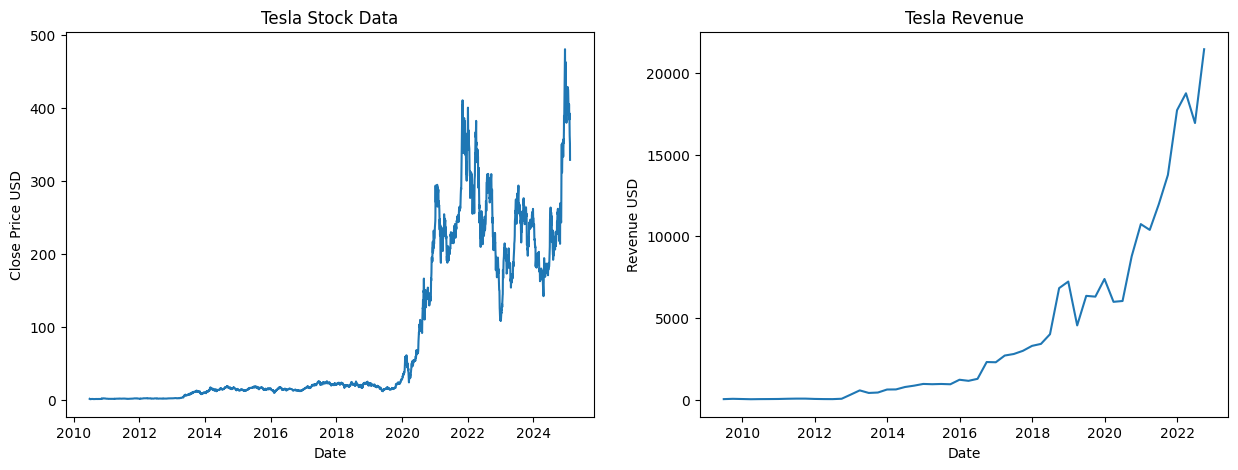

In [27]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the make_graph function (you'll need to have this defined already)
def make_graph(tesla_data, tesla_revenue, title):
    tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
    tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
    tesla_revenue.sort_values(by=['Date'], inplace=True)
    tesla_data.sort_values(by=['Date'], inplace=True)
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(tesla_data.Date, tesla_data['Close'])
    plt.title(title + ' Stock Data')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD')
    plt.subplot(1,2,2)
    plt.plot(tesla_revenue.Date, tesla_revenue['Revenue'])
    plt.title(title + ' Revenue')
    plt.xlabel('Date')
    plt.ylabel('Revenue USD')
    plt.show()


# Get Tesla data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Get Tesla revenue (replace with your actual code to get tesla_revenue)
# This is a placeholder; you'll need to define how you get this data
try:
    response = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm")
    response.raise_for_status()
    html_data = response.text
    soup = BeautifulSoup(html_data, 'html5lib')
    table_body = soup.find_all("tbody")[1]
    tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

    for row in table_body.find_all("tr"):
        cells = row.find_all("td")
        if len(cells) == 2:
            date = cells[0].text.strip()
            revenue = cells[1].text.strip().replace(",", "").replace("$", "")
            tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

    tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')
    tesla_revenue.dropna(subset=['Revenue'], inplace=True)
except requests.exceptions.RequestException as e:
    print(f"Error fetching URL: {e}")
except Exception as e:
    print(f"An error occurred: {e}")



# Call the make_graph function
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
